#  User Story 15 - Statistical Analysis of Average Annual Profit

##  Introduction

In railway station management, assessing the **annual profit trends** is crucial for strategic decision-making. This analysis aims to calculate statistical measures of the **average annual profit** for a user-specified railway station. By understanding key metrics such as **mean, median, mode, standard deviation, and outliers**, railway managers can make informed decisions regarding operational efficiency and financial planning.

---

##  Objectives

1. **Data Loading and Preparation:**
   - Load data from the `Stations_Data.csv` file.
   - Filter the data based on the specified railway station.

2. **Profit Calculation:**
   - Calculate the **annual profit** as the difference between **revenues and expenses**.

3. **Descriptive Statistics Calculation:**
   - Compute **mean, median, mode, and standard deviation** of the annual profit.

4. **Outlier Detection:**
   - Identify **unusual profit values** using the **Interquartile Range (IQR)** method.

5. **Identification of Extreme Years:**
   - Determine the **most and least profitable years**.

6. **Visualization:**
   - Plot a **boxplot** to visualize the profit distribution and detect outliers.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print(" Loading data from 'Stations_Data.csv'...")
try:
    df = pd.read_csv("Stations_Data.csv", delimiter=';', decimal=',')
    df.columns = df.columns.str.strip()
    print(" Data loaded successfully!")
except FileNotFoundError:
    print(" Error: File 'Stations_Data.csv' not found.")
    exit()

 Loading data from 'Stations_Data.csv'...
 Data loaded successfully!


##  Profit Calculation Formula

The profit for each year is calculated as:

$$
\text{Profit} = \text{Revenues} - \text{Expenses}
$$

This formula allows us to understand the net financial gain or loss for each year at the selected railway station.


In [3]:
station_name = input("Enter the station name: ").strip()

station_df = df[df['Station'] == station_name].copy()

if station_df.empty:
    print(f"No data found for station '{station_name}'. Please check the name and try again.")
else:
    print(f"{len(station_df)} records found for {station_name}.")

station_df['Revenues'] = station_df['Revenues'].astype(float)
station_df['Expenses'] = station_df['Expenses'].astype(float)
station_df['Profit'] = station_df['Revenues'] - station_df['Expenses']

station_df[['Year', 'Month', 'Revenues', 'Expenses', 'Profit']].head()

Enter the station name:  Berlin


120 records found for Berlin.


,Year,Month,Revenues,Expenses,Profit
4,2015,1,2012.37,2013.24,-0.87
9,2015,2,2204.59,2840.30,-635.71
14,2015,3,2673.12,2292.50,380.62
19,2015,4,2398.29,1924.13,474.16
24,2015,5,2032.25,1797.39,234.86


##  Descriptive Statistics Formulas

### 1. Mean (Arithmetic Average)

The mean represents the central tendency of the annual profit:

$$
\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

### 2. Standard Deviation

Standard deviation measures how spread out the profit values are from the mean:

$$
\sigma = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2}
$$

### 3. Median

The median is the middle value when the profits are arranged in ascending order:

$$
\text{Median} =
\begin{cases} 
x_{\left(\frac{n+1}{2}\right)}, & \text{if } n \text{ is odd} \\
\frac{x_{\left(\frac{n}{2}\right)} + x_{\left(\frac{n}{2} + 1\right)}}{2}, & \text{if } n \text{ is even}
\end{cases}
$$

### 4. Mode

The mode is the most frequently occurring profit value:

$$
\text{Mode} = \text{argmax}_x \; f(x)
$$

Where $ f(x) $  is the frequency of value $ x $.


In [4]:
# Calculate Annual Average Profit
annual_profit = station_df.groupby('Year')['Profit'].mean().reset_index()
annual_profit.rename(columns={'Profit': 'Average_Profit'}, inplace=True)

In [5]:
# Descriptive Statistics for Annual Profit
mean_profit = annual_profit['Average_Profit'].mean()
std_profit = annual_profit['Average_Profit'].std()
median_profit = annual_profit['Average_Profit'].median()
mode_profit = annual_profit['Average_Profit'].mode().iloc[0] if not annual_profit['Average_Profit'].mode().empty else None

print("=== Descriptive Statistics ===")
print(f"Mean Annual Profit: {mean_profit:.2f} €")
print(f"Standard Deviation of Annual Profit: {std_profit:.2f} €")
print(f"Median Annual Profit: {median_profit:.2f} €")
print(f"Mode Annual Profit: {mode_profit:.2f} €")

=== Descriptive Statistics ===
Mean Annual Profit: 963.90 €
Standard Deviation of Annual Profit: 1040.52 €
Median Annual Profit: 630.37 €
Mode Annual Profit: 54.65 €


##  Outlier Detection Formula (IQR Method)

To identify unusual profit values, calculate the **Interquartile Range (IQR)**:

$$
IQR = Q_3 - Q_1
$$

Define the outlier boundaries as follows:

$$
\text{Lower Bound} = Q_1 - 1.5 \times IQR
$$

$$
\text{Upper Bound} = Q_3 + 1.5 \times IQR
$$

Any value outside this range is considered an **outlier**, indicating exceptional financial performance or irregular data.


In [6]:
# Outlier Detection using IQR
Q1 = annual_profit['Average_Profit'].quantile(0.25)
Q3 = annual_profit['Average_Profit'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outlier years
outliers = annual_profit[(annual_profit['Average_Profit'] < lower_bound) | (annual_profit['Average_Profit'] > upper_bound)]

print("\n=== Outlier Profits ===")
if not outliers.empty:
    print(f"Outlier Years (Average Profit outside [{lower_bound:.2f}, {upper_bound:.2f}]):")
    display(outliers)
else:
    print("No outlier profits detected.")


=== Outlier Profits ===
Outlier Years (Average Profit outside [-1198.99, 2530.35]):


,Year,Average_Profit
8,2023,3307.075


##  Most and Least Profitable Years Formulas

### Most Profitable Year:

$$
\text{Max Profit} = \max(x_1, x_2, \dots, x_n)
$$

### Least Profitable Year:

$$
\text{Min Profit} = \min(x_1, x_2, \dots, x_n)
$$

These formulas identify the years with the **highest and lowest profitability**, which are critical for evaluating station performance.


In [9]:
#  Most and Least Profitable Years
most_profitable = annual_profit.loc[annual_profit['Average_Profit'].idxmax()]
least_profitable = annual_profit.loc[annual_profit['Average_Profit'].idxmin()]

print("\n Most Profitable Year:")
print(f"Year: {int(most_profitable['Year'])}, Average Profit: {most_profitable['Average_Profit']:.2f}")

print("\n Least Profitable Year:")
print(f"Year: {int(least_profitable['Year'])}, Average Profit: {least_profitable['Average_Profit']:.2f}")


 Most Profitable Year:
Year: 2023, Average Profit: 3307.07

 Least Profitable Year:
Year: 2015, Average Profit: 54.65


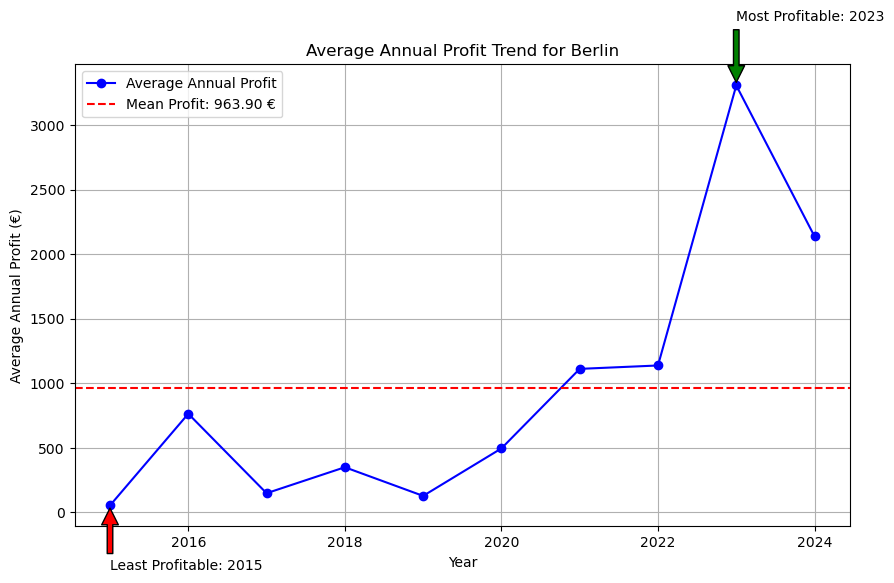

In [13]:
# Annual Profit Line Plot with Annotations
plt.figure(figsize=(10, 6))
plt.plot(annual_profit['Year'], annual_profit['Average_Profit'], marker='o', linestyle='-', color='blue', label='Average Annual Profit')
plt.axhline(y=mean_profit, color='red', linestyle='--', label=f'Mean Profit: {mean_profit:.2f} €')

# Annotate the most profitable year
plt.annotate(f"Most Profitable: {int(most_profitable['Year'])}", 
             xy=(most_profitable['Year'], most_profitable['Average_Profit']), 
             xytext=(most_profitable['Year'], most_profitable['Average_Profit'] + 500),
             arrowprops=dict(facecolor='green', shrink=0.05))

# Annotate the least profitable year
plt.annotate(f"Least Profitable: {int(least_profitable['Year'])}", 
             xy=(least_profitable['Year'], least_profitable['Average_Profit']), 
             xytext=(least_profitable['Year'], least_profitable['Average_Profit'] - 500),
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.title(f"Average Annual Profit Trend for {station_name}")
plt.xlabel("Year")
plt.ylabel("Average Annual Profit (€)")
plt.legend()
plt.grid(True)
plt.show()

##  Interpretation of Results

The analysis provides insights into the **profitability trends** of the selected railway station:

- The **mean and median** indicate the **central tendency** of annual profits.
- The **standard deviation** shows how much the profits vary from year to year.
- **Outliers** highlight years with **unusually high or low** profitability.
- Identifying the **most and least profitable years** helps pinpoint **exceptional financial performances**.

These metrics enable railway management to make **data-driven decisions** regarding **investment, resource allocation, and operational improvements**.


##  Student Contribution
**Implemented by student**: Yasamin Ebrahimi (1232162)

# US16 - Comparative Analysis of Passenger Arrivals Across All Stations

## Introduction
Comparing the **passenger arrivals across railway stations** is essential to enhance strategic planning for a better railway management system. This analysis aims to calculate and detect variations, identify anomalies for enhancing strategic operations. Just like in US15, we have to understand metrics such as **mean**, **median**, **maximum**, **minimum**, **standard deviation** and **outliers**, as railway operators and managers can improve efficiency and financial decisions.

---

## Theoretical Background: 
Boxplots, also known as box-and-whisker plots, are a statistical visualization tool used to display the distribution of a dataset based on five-number summaries: minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum. They are particularly effective in identifying the spread, central tendency, and presence of outliers in data.

In the context of passenger arrivals, boxplots allow for a station-by-station comparison, highlighting patterns such as spikes, consistent volumes, or anomalies. These visualizations support data-driven decision-making in transportation planning.

---

##  Objectives

1. **Data Loading and Preparation:**
   - Reload data from the `Stations_Data.csv` file, to account for any dataframe manipulation on the previous user story.
   - Filter the data based on the needed columns, **name of the station and passengers**.

2. **Descriptive Statistics Calculation:**
   - Compute **mean, median, maximum, minimum, and standard deviation** for each station passenger arrivals.

3. **Identification of Extreme Stations:**
   - Determine the **most and least used stations by passengers**.

4. **Outlier Detection:**
   - Identify **unusual passenger arrival values** using the **Interquartile Range (IQR)** formulas.

5. **Visualization:**
   - Plot a **boxplot** for each station to visualize the passenger distribution and detect outliers.


In [5]:
# Import data again
try:    
    df = pd.read_csv('Stations_Data.csv', sep=';')
    print("Data successfully reimported!")
except FileNotFoundError:
    print(" Error: File 'Stations_Data.csv' not found.")
    exit()
    

Data successfully reimported!


##  Descriptive Statistics Formulas

### 1. Mean (Arithmetic Average)

The mean represents the central tendency of the number of passengers per station:

$$
\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

### 2. Standard Deviation

Standard deviation measures how spread out the number of passengers per station are from the mean:

$$
\sigma = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2}
$$

### 3. Median

The median is the middle value when the number of passengers per station are arranged in ascending order:

$$
\text{Median} =
\begin{cases} 
x_{\left(\frac{n+1}{2}\right)}, & \text{if } n \text{ is odd} \\
\frac{x_{\left(\frac{n}{2}\right)} + x_{\left(\frac{n}{2} + 1\right)}}{2}, & \text{if } n \text{ is even}
\end{cases}
$$

---

### Maximum passengers per station:
$$
\text{Max Passengers} = \max(x_1, x_2, \dots, x_n)
$$

### Minimum passengers per station:
$$
\text{Min Passengers} = \max(x_1, x_2, \dots, x_n)
$$

This formulas help getting the **maximum** and **minimum** number of passengers in a determined station.

In [13]:
# Keep needed columns
df = df[['Station', 'Passengers']]
# Group by station
df_grouped = df.groupby('Station')

mean = df_grouped['Passengers'].mean().round(2)
median = df_grouped['Passengers'].median().round(2)
std = df_grouped['Passengers'].std().round(2)
maximum = df_grouped['Passengers'].max()
minimum = df_grouped['Passengers'].min()

# Combinar tudo em um único DataFrame
stats_df = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Standard Deviation': std,
    'Max': maximum,
    'Min': minimum
})

print("========             Descriptive Statistics              ========")
print(stats_df)

========             Descriptive Statistics              ========
                Mean    Median  Standard Deviation      Max   Min
Station                                                          
Berlin     453342.85  356093.0           368290.07  1312378   438
Frankfurt  448531.42  391219.5           349761.36  1538015   586
Hamburg    619691.58  560178.5           536111.34  2559534  2210
Hannover   344955.51  309050.0           262605.43  1183180    12
Stuttgart  569075.24  511673.0           452219.37  1871333   610


##  Outlier Detection Formula (IQR Method)

To identify unusual profit values, we calculate the **Interquartile Range (IQR)**:

$$
IQR = Q_3 - Q_1
$$

We defined the outlier boundaries as follows:

$$
\text{Lower Bound} = Q_1 - 1.5 \times IQR
$$

$$
\text{Upper Bound} = Q_3 + 1.5 \times IQR
$$

Any value outside this range is considered an **outlier**, indicating exceptional financial performance or irregular data.

In [21]:
Q1 = df_grouped['Passengers'].quantile(0.25)
Q3 = df_grouped['Passengers'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = {}
for station, data in df_grouped:
    outliers[station] = data[(data['Passengers'] < lower_bound[station]) | (data['Passengers'] > upper_bound[station])]

outlier_stations = {station: outliers[station] for station in outliers if not outliers[station].empty}
print("Outliers per station:")
for station in outlier_stations:
    print(f"{outlier_stations[station]}")

Outliers per station:
       Station  Passengers
491  Frankfurt     1270578
496  Frankfurt     1283581
501  Frankfurt     1538015
506  Frankfurt     1366105
511  Frankfurt     1444617
526  Frankfurt     1280669
531  Frankfurt     1477557
     Station  Passengers
488  Hamburg     2037599
493  Hamburg     1978505
503  Hamburg     2122227
508  Hamburg     2055161
518  Hamburg     2559534
528  Hamburg     2028142
      Station  Passengers
492  Hannover     1073085
512  Hannover     1183180
       Station  Passengers
495  Stuttgart     1871333
500  Stuttgart     1786094
520  Stuttgart     1686983
530  Stuttgart     1714610


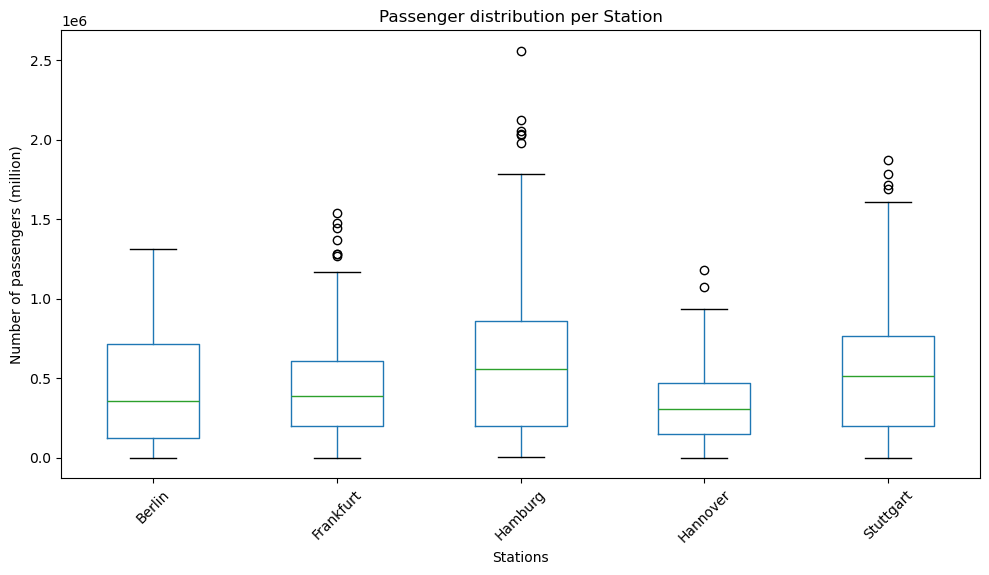

In [22]:
df.boxplot(column='Passengers', by='Station', figsize=(10, 6), grid=False)
plt.title('Passenger distribution per Station')
plt.suptitle('')
plt.xlabel('Stations')
plt.ylabel('Number of passengers (million)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##  Interpretation of Results

The analysis provides insights into the **trends** for each station:

### Central Tendencies

- Hamburg has the highest **average**, **median**, but also the largest **standard deviation**. The **outliers** manage to drive up the **mean**, so considering the **mean** is higher than the **median** ($619691.58 \gt 560178.5$) we concluded that there is a right skew in the data for Hamburg.
  
- Hannover, on the other hand, shows the lowest **mean**, lowest **median** and smallest **standard deviation**, considering that the traffic in Hannover is lower, but more consistent.

### Variability and Resource Planning

- The highest variability stations (**Hamburg** and **Stuttgart**) might require higher staff flexibility and dynamic scheduling in the long term to handle the variation in traffic.

- The lowest variability station (**Hannover**) can plan with a more fixed schedule and staff, given its steadier traffic.

### Outlier Analysis

$$
\begin{array}{ccc}
\text{\textbf{Station}} & \text{\textbf{ Num of Outliers }} & \text{\textbf{Highest Outlier}} \\
\text{Frankfurt  } & 7 & 1\,538\,015 \\
\text{Hamburg  }   & 6 & 2\,559\,534 \\
\text{Hannover  }  & 2 & 1\,183\,180 \\
\text{Stuttgart  } & 4 & 1\,871\,333 
\end{array}
$$

- Berlin doesn't show any outliers, suggesting its traffic patterns are stabler.

- Hannover has two outliers, and has the lowest outliers out of the 5 stations (Berlin doesn't have any), but might have significant peaks considering it has the lowest mean of them all.

- Hamburg might face the greatest risk of overload system, considering their spike in passengers, so the management should be cautious.

All of these metrics enable railway management to make **data-driven decisions** regarding **investment, resource allocation, and operational improvements**.

##  Student Contribution
**Implemented by student**: Henrique Silva (1240588) - **100%**